In [27]:
#!/usr/bin/env python
# coding: utf-8
# In[29]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime as dt

In [28]:
## data extraction 
DIR='C:/Users/NkululekoM/Desktop/ModelRun_Outputs/croco_tutorials/basin_his.nc'
inifile=DIR
print(inifile)

C:/Users/NkululekoM/Desktop/ModelRun_Outputs/croco_tutorials/basin_his.nc


In [29]:
DS = xr.open_mfdataset(inifile)
# In[33]:

In [30]:
## extract the required variables
time_Plot=DS['time']
eta_rho_Plot =DS['eta_rho']
s_rho_Plot =DS['s_rho']
xi_rho_Plot =DS['xi_rho']
SST_Plot =DS['temp']

zeta_Plot = DS['zeta']

u_Plot =DS['u']
v_Plot =DS['v']

ubar_Plot = DS['ubar']
vbar_Plot = DS['vbar']

x_rho_Plot =DS['x_rho']
y_rho_Plot =DS['y_rho']

In [31]:
# # ZETA (SSH Animation) Simulation
# In[34]:
time_Plot=DS['time']
s_rho_Plot =DS['s_rho']
SST_Plot =DS['temp']

In [32]:
# In[35]:
eta_rho_Plot =DS['eta_rho'].values
xi_rho_Plot =DS['xi_rho'].values

x_rho_Plot =DS['x_rho'].values
y_rho_Plot =DS['y_rho'].values

u =DS['u'].values
v =DS['v'].values

ubar_Plot = DS['ubar'].values
vbar_Plot = DS['vbar'].values

zeta_Plot = DS['zeta'].values

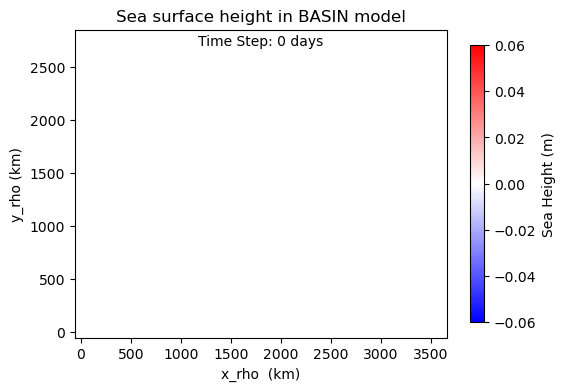

MovieWriter imagemagick unavailable; using Pillow instead.


In [33]:
# In[36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

km = 1000

fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.pcolormesh(x_rho_Plot/km, y_rho_Plot/km, zeta_Plot[0,:,:],
                    vmin=-.06, vmax=.06, cmap='bwr')
##fig.colorbar(cax)
cbar = fig.colorbar(cax, ax=ax, shrink=0.9)
cbar.set_label('Sea Height (m)')

text = ax.text(0.5, 0.95, '', transform=ax.transAxes, ha='center')
plt.xlabel("x_rho  (km)")
plt.ylabel("y_rho (km)")
plt.title("Sea surface height in BASIN model")

def animate(i):
    cax.set_array(zeta_Plot[i,:,:].flatten())
    text.set_text(f'Time Step: {i*10}'+" days")  # Update the text header with the current time step

anim = FuncAnimation(fig, animate, frames=len(time_Plot)-1, interval=700)

plt.draw()
plt.show()

anim.save('Basin_Wide_SSH_Simulation.gif', writer='imagemagick')

In [34]:
# In[37]:
import sys
import os

# Add the directory to the Python import search path
directory_path = 'C:/Users/NkululekoM/Desktop/WebDevelopment/somisana/toolkit/cli/applications/croco/'
sys.path.append(directory_path)

# Now you can import modules from the added directory
import postprocess

v_test = postprocess.v2rho(v[1,:,:,:])
u_test = postprocess.u2rho(u[1,:,:,:])

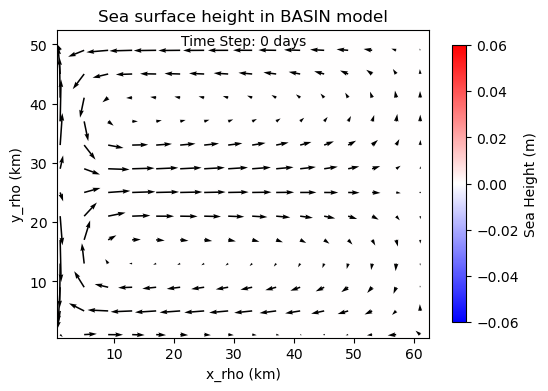

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: index 10 is out of bounds for axis 0 with size 10

In [24]:
# # ZETA (SSH Animation with current vectors) Simulation
# In[38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

km = 1

fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.pcolormesh(xi_rho_Plot/km, eta_rho_Plot/km, zeta_Plot[0,:,:],
                    vmin=-.06, vmax=.06, cmap='bwr')
cbar = fig.colorbar(cax, ax=ax, shrink=0.9)
cbar.set_label('Sea Height (m)')

text = ax.text(0.5, 0.95, '', transform=ax.transAxes, ha='center')
plt.xlabel("x_rho (km)")
plt.ylabel("y_rho (km)")
plt.title("Sea surface height in BASIN model")

# Plot every 4th arrow
step = 4
x_q, y_q = xi_rho_Plot[::step], eta_rho_Plot[::step]

qax = ax.quiver(x_q, y_q,
                u_test[0,::step, ::step], v_test[0,::step, ::step],
                scale=0.1)

def animate(i):
    qax.set_UVC(u_test[i,::step, ::step], v_test[i,::step, ::step])
    cax.set_array(zeta_Plot[i, :, :].flatten())
    text.set_text(f'Time Step: {i*10}'+" days")  # Update the text header with the current time step
    
anim = FuncAnimation(fig, animate, frames=len(time_Plot)-1, interval=700)

plt.draw()
plt.show()

anim.save('Basin_Wide_SSH_&_Current_Simulation.gif', writer='imagemagick')
# In[ ]:

In [35]:
!jupyter nbconvert --to script mycode.ipynb
with open('Basin_Wide_SSH_&_Current_Simulation.py', 'r') as f:
    lines = f.readlines()
with open('Basin_Wide_SSH_&_Current_Simulation.py', 'w') as f:
    for line in lines:
        if 'nbconvert --to script' in line:
            break
        else:
            f.write(line)

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'mycode.ipynb' matched no files


FileNotFoundError: [Errno 2] No such file or directory: 'Basin_Wide_SSH_&_Current_Simulation.py'